In [109]:
import pandas as pd
import seaborn as sns
import os
import re

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error
import numpy as np

In [104]:
def get_local_csvs(directory="."):
    file_list = []
    for filename in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, filename)):
            if filename.endswith(".csv") and filename.startswith('Simple'):
                file_list.append(filename)
    return file_list

directory_path = "."
files = get_local_csvs(directory_path)

print("List of files in the directory:")
for file in files:
    print(file)

List of files in the directory:
Simple_Base Decision Tree_ActualVSPred_RMSE_8.997.csv
Simple_XGBoost Best Model_ActualVSPred_RMSE_7.421.csv
Simple_Tuned Decision Tree_ActualVSPred_RMSE_8.0885.csv
Simple_XGBoost Best Model_ActualVSPred_RMSE_6.3199.csv
Simple_XGBoost Base Model_ActualVSPred_RMSE_7.4708.csv
Simple_XGBoost Best Model_ActualVSPred_RMSE_6.3181.csv
Simple_XGBoost Best Model_ActualVSPred_RMSE_7.4413.csv
Simple_Random Forest Initial Model_ActualVSPred_RMSE_6.8805.csv
Simple_Random Forest Best Model_ActualVSPred_RMSE_6.8805.csv


In [71]:
def read_csvs():
    """
    Import each of the files and merge them into a single dataframe
    """
    pattern = r"_ActualVSPred_RMSE_\d+(\.\d+)?"
    RMSE_pattern = r"[A-Za-z].*?"
    ending_period_pattern = r".$"
    
    csv_list = get_local_csvs(".")
    dataframe_list = []
    for i in csv_list:
        dataframe = pd.read_csv(i)
        dataframe["Model"] = f'{re.sub(pattern, "", (i.replace(" ", "_"))).replace(".csv", "")}'
        dataframe["RMSE"] = f'{re.sub(ending_period_pattern, "", re.sub(RMSE_pattern, "", (i.replace(" ", ""))).replace("_", ""))}'
        dataframe["RMSE"] = pd.to_numeric(dataframe["RMSE"])
        dataframe_list.append(dataframe)
    
    df = pd.concat(dataframe_list)
    df.rename(columns={"predictions":"prediction"}, inplace=True)
    return df
    

In [72]:
actuals_vs_predictions_tree = read_csvs()

In [73]:
actuals_vs_predictions_tree['Model'].unique()

array(['Simple_Base_Decision_Tree', 'Simple_XGBoost_Best_Model',
       'Simple_Tuned_Decision_Tree', 'Simple_XGBoost_Base_Model',
       'Simple_Random_Forest_Initial_Model',
       'Simple_Random_Forest_Best_Model'], dtype=object)

In [74]:
actuals_vs_predictions_tree['RMSE'].unique()

array([8.997 , 7.421 , 8.0885, 6.3199, 7.4708, 6.3181, 7.4413, 6.8805])

In [75]:
actuals_vs_predictions_tree

,actual,prediction,Model,RMSE
0,1.915364,1.918451,Simple_Base_Decision_Tree,8.9970
1,42.192954,43.101828,Simple_Base_Decision_Tree,8.9970
2,0.342828,0.342654,Simple_Base_Decision_Tree,8.9970
3,1.887241,1.889281,Simple_Base_Decision_Tree,8.9970
4,0.000000,0.000000,Simple_Base_Decision_Tree,8.9970
...,...,...,...,...
1327,16.088034,15.872868,Simple_Random_Forest_Best_Model,6.8805
1328,2.291868,2.269025,Simple_Random_Forest_Best_Model,6.8805
1329,10.681935,10.740187,Simple_Random_Forest_Best_Model,6.8805
1330,21.724962,17.815816,Simple_Random_Forest_Best_Model,6.8805


[Text(0.5, 1.0, 'Predictions - Fentanyl')]

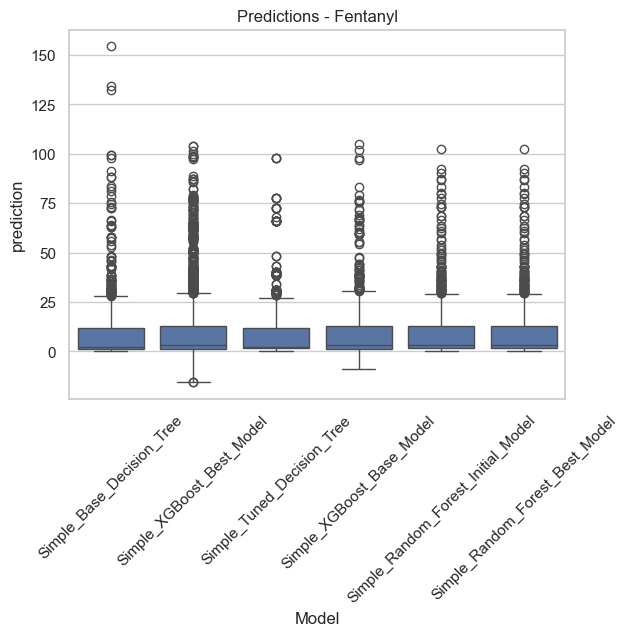

In [76]:
preds_boxplot = sns.boxplot(actuals_vs_predictions_tree, x="Model", y="prediction")
for item in preds_boxplot.get_xticklabels():
    item.set_rotation(45)

title = 'Predictions - Fentanyl'
preds_boxplot.set(title=title)


[Text(0.5, 1.0, 'Actuals - Fentanyl')]

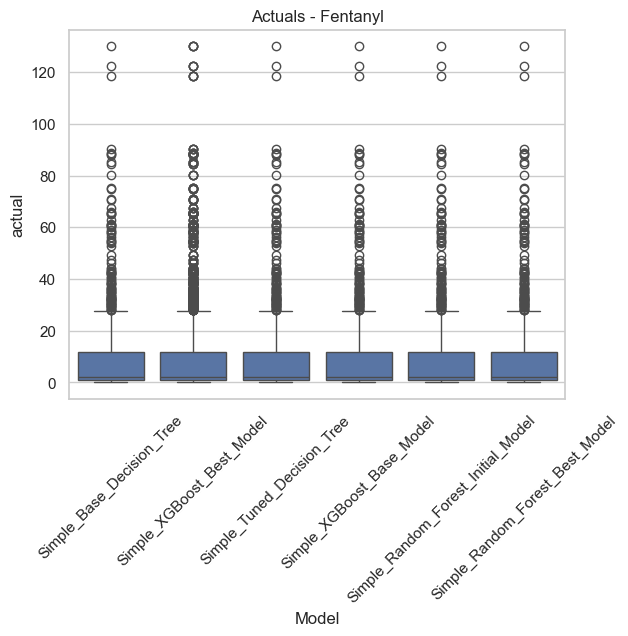

In [77]:
actual_boxplot = sns.boxplot(actuals_vs_predictions_tree, x="Model", y="actual")
for item in actual_boxplot.get_xticklabels():
    item.set_rotation(45)

title = 'Actuals - Fentanyl'
actual_boxplot.set(title=title)

In [78]:
y_actual = list(actuals_vs_predictions_tree['actual'])
y_predicted = list(actuals_vs_predictions_tree['prediction'])

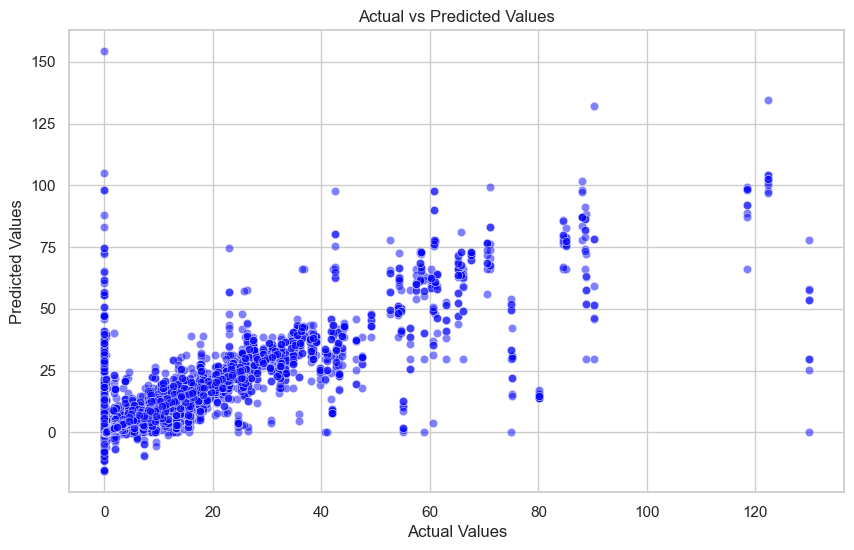

In [79]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_actual, y=y_predicted, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

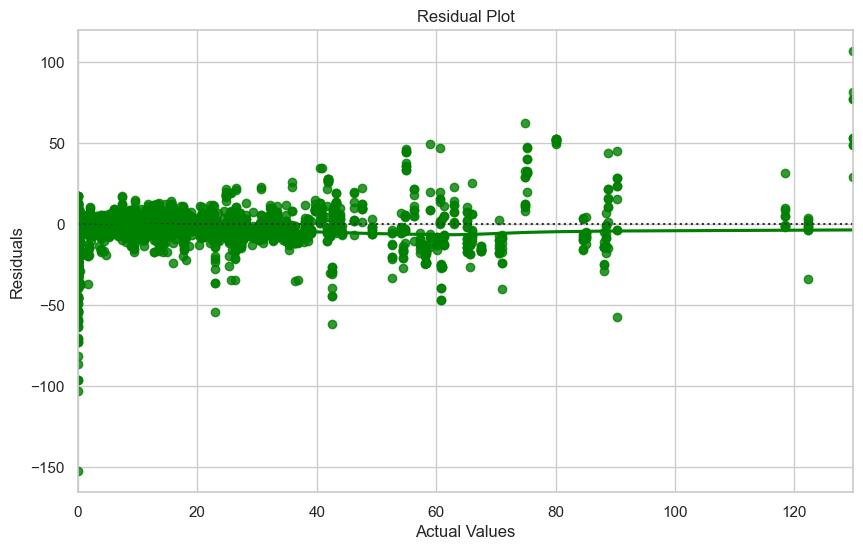

In [80]:
# Residual plot
residuals = np.array(y_actual) - np.array(y_predicted)
plt.figure(figsize=(10, 6))
sns.residplot(x=y_actual, y=residuals, lowess=True, color='green')
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

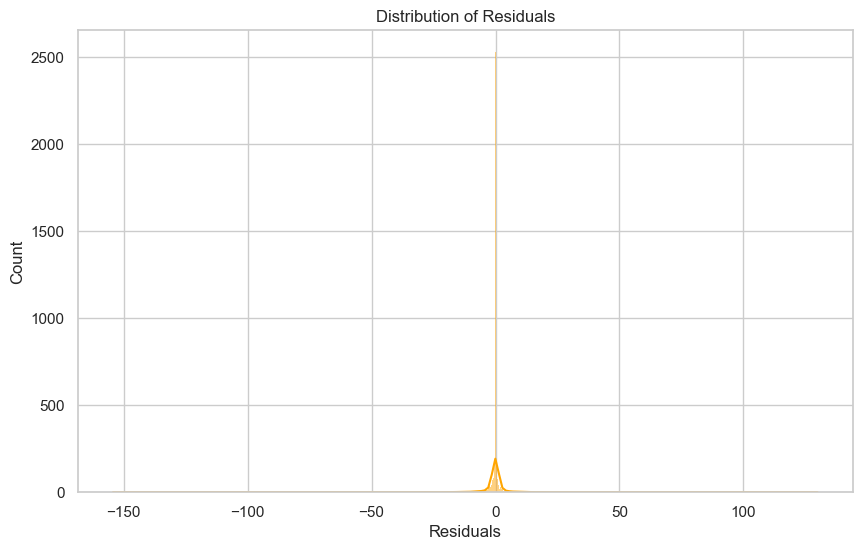

In [81]:
# Distribution plot of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='orange')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

## Selected Model

In [85]:
actuals_vs_predictions_tree['RMSE'].min()

6.3181

In [86]:
selected_model = actuals_vs_predictions_tree[actuals_vs_predictions_tree['RMSE'] == actuals_vs_predictions_tree['RMSE'].min()]

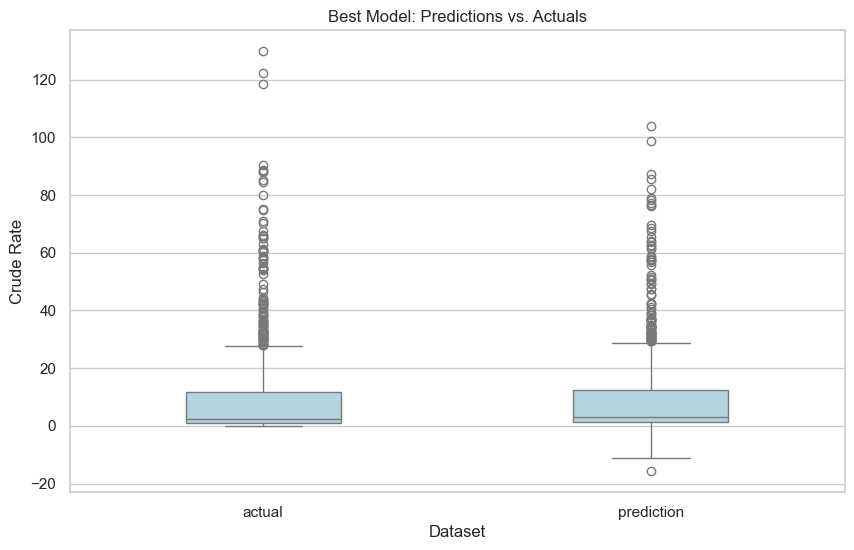

In [98]:
# Create a boxplot with two columns using the 'hue' parameter
plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', 
            data=selected_model.melt()[(selected_model.melt()['variable'] != 'RMSE') & 
            (selected_model.melt()['variable'] != 'Model')], 
            color='lightblue', 
            width=0.4)
plt.title('Best Model: Predictions vs. Actuals')
plt.xlabel('Dataset')
plt.ylabel('Crude Rate')
plt.show()


In [99]:
y_actual_best = list(selected_model['actual'])
y_predicted_best = list(selected_model['prediction'])

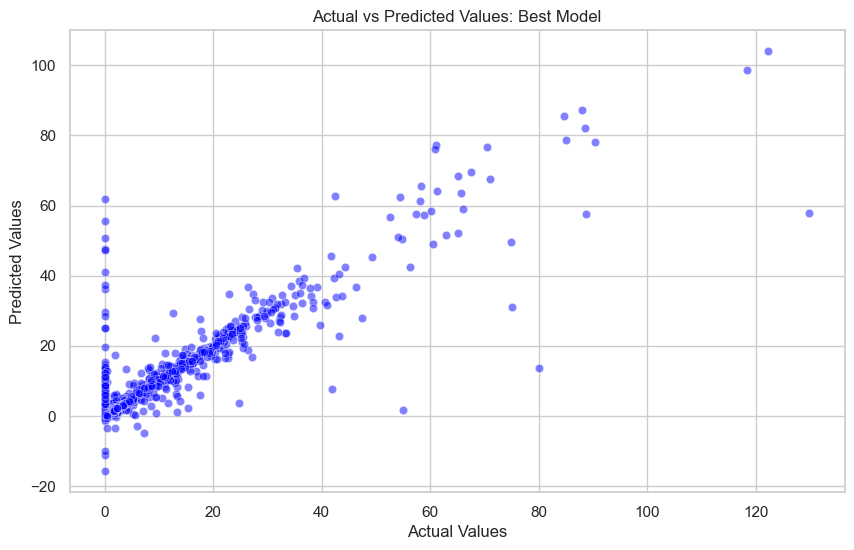

In [101]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_actual_best, y=y_predicted_best, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Values: Best Model')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

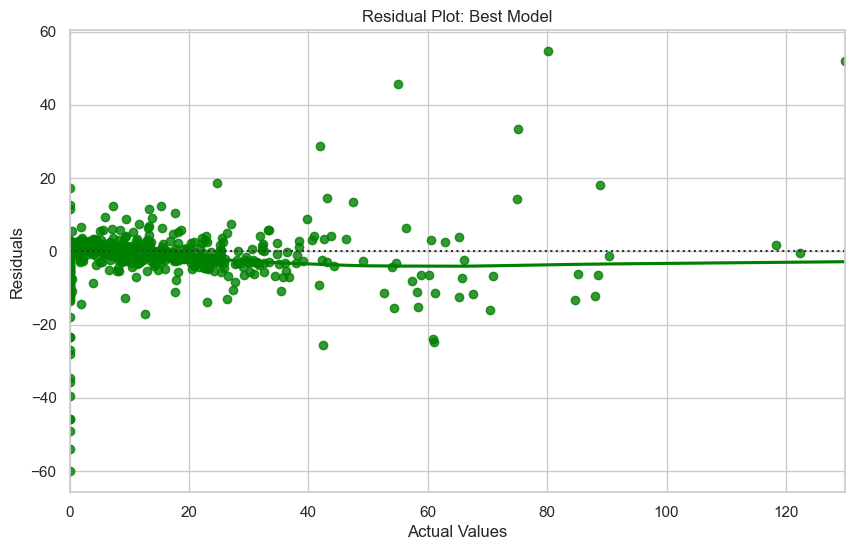

In [103]:
# Residual plot
residuals = np.array(y_actual_best) - np.array(y_predicted_best)
plt.figure(figsize=(10, 6))
sns.residplot(x=y_actual_best, y=residuals, lowess=True, color='green')
plt.title('Residual Plot: Best Model')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

## Demographics and Smoothing

In [129]:
full_results_best_model = pd.read_csv('Full_XGBoost Best Model_ActualVSPred_RMSE_6.3181.csv')

In [130]:
full_results_best_model

,Year,Population,socioec quintile,Gender_Female,Gender_Male,Race_American Indian or Alaska Native,Race_Asian or Pacific Islander,Race_Black or African American,Race_More than one race,Race_White,...,Five-Year Age Groups_50-54 years,Five-Year Age Groups_55-59 years,Five-Year Age Groups_60-64 years,Five-Year Age Groups_65-69 years,Five-Year Age Groups_70-74 years,Five-Year Age Groups_75-79 years,Five-Year Age Groups_80-84 years,Five-Year Age Groups_ 1 year,Actual Crude Rate,Predicted Crude Rate
0,2009,261047,4.0,True,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,1.915364,1.827514
1,2020,407651,2.0,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,42.192954,39.215958
2,2003,1458456,5.0,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,0.342828,0.322451
3,2014,264937,5.0,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,1.887241,2.579009
4,2021,3582,1.0,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,0.000000,50.777752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,2019,31079,3.0,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,16.088034,15.624564
1328,2009,1658036,2.0,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,2.291868,2.292558
1329,2011,46808,1.0,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,10.681935,11.307896
1330,2019,400461,4.0,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,21.724962,24.009506


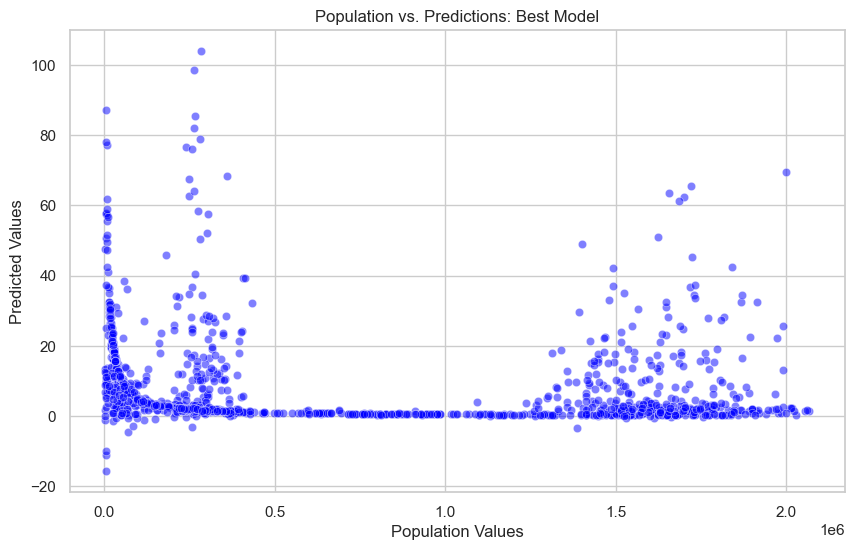

In [131]:
# Scatter plot of Population vs. Predicted values
pop = list(full_results_best_model['Population'])
pred = list(full_results_best_model['Predicted Crude Rate'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pop, y=pred, color='blue', alpha=0.5)
plt.title('Population vs. Predictions: Best Model')
plt.xlabel('Population Values')
plt.ylabel('Predicted Values')
plt.show()

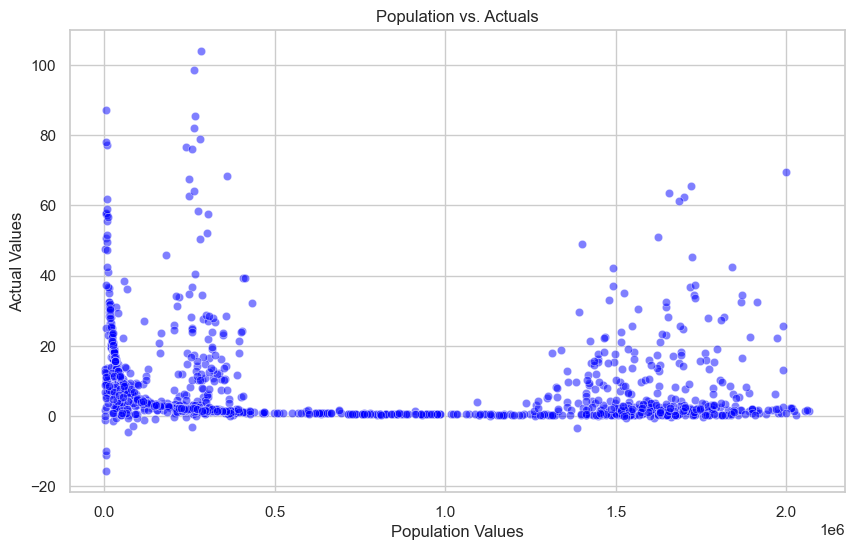

In [132]:
# Scatter plot of Population vs. Predicted values
pop = list(full_results_best_model['Population'])
actual = list(full_results_best_model['Actual Crude Rate'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pop, y=pred, color='blue', alpha=0.5)
plt.title('Population vs. Actuals')
plt.xlabel('Population Values')
plt.ylabel('Actual Values')
plt.show()

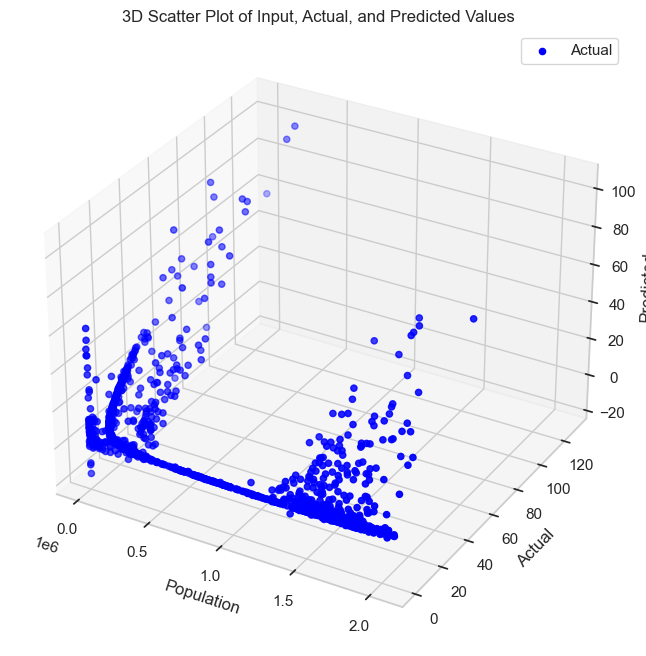

In [133]:
# Set up a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for Actual vs Input vs Predicted
ax.scatter(pop, actual, pred, c='blue', marker='o', label='Actual')
ax.set_xlabel('Population')
ax.set_ylabel('Actual')
ax.set_zlabel('Predicted')
ax.set_title('3D Scatter Plot of Input, Actual, and Predicted Values')

plt.legend()
plt.show()


In [134]:
full_results_best_model.columns

Index(['Year', 'Population', 'socioec quintile', 'Gender_Female',
       'Gender_Male', 'Race_American Indian or Alaska Native',
       'Race_Asian or Pacific Islander', 'Race_Black or African American',
       'Race_More than one race', 'Race_White',
       'Five-Year Age Groups_1-4 years', 'Five-Year Age Groups_10-14 years',
       'Five-Year Age Groups_15-19 years', 'Five-Year Age Groups_20-24 years',
       'Five-Year Age Groups_25-29 years', 'Five-Year Age Groups_30-34 years',
       'Five-Year Age Groups_35-39 years', 'Five-Year Age Groups_40-44 years',
       'Five-Year Age Groups_45-49 years', 'Five-Year Age Groups_5-9 years',
       'Five-Year Age Groups_50-54 years', 'Five-Year Age Groups_55-59 years',
       'Five-Year Age Groups_60-64 years ', 'Five-Year Age Groups_65-69 years',
       'Five-Year Age Groups_70-74 years', 'Five-Year Age Groups_75-79 years',
       'Five-Year Age Groups_80-84 years', 'Five-Year Age Groups_ 1 year',
       'Actual Crude Rate', 'Predicted Crude

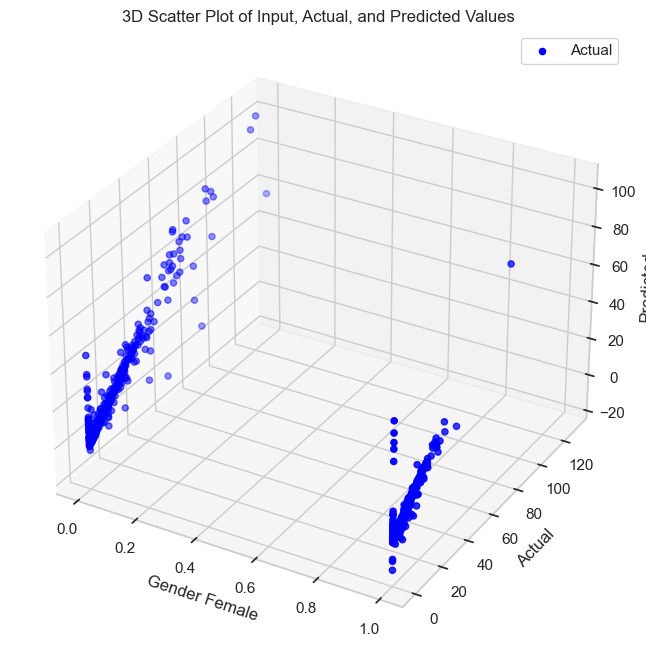

In [135]:
# Set up a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for Actual vs Input vs Predicted
ax.scatter(list(full_results_best_model['Gender_Female']), actual, pred, c='blue', marker='o', label='Actual')
ax.set_xlabel('Gender Female')
ax.set_ylabel('Actual')
ax.set_zlabel('Predicted')
ax.set_title('3D Scatter Plot of Input, Actual, and Predicted Values')

plt.legend()
plt.show()

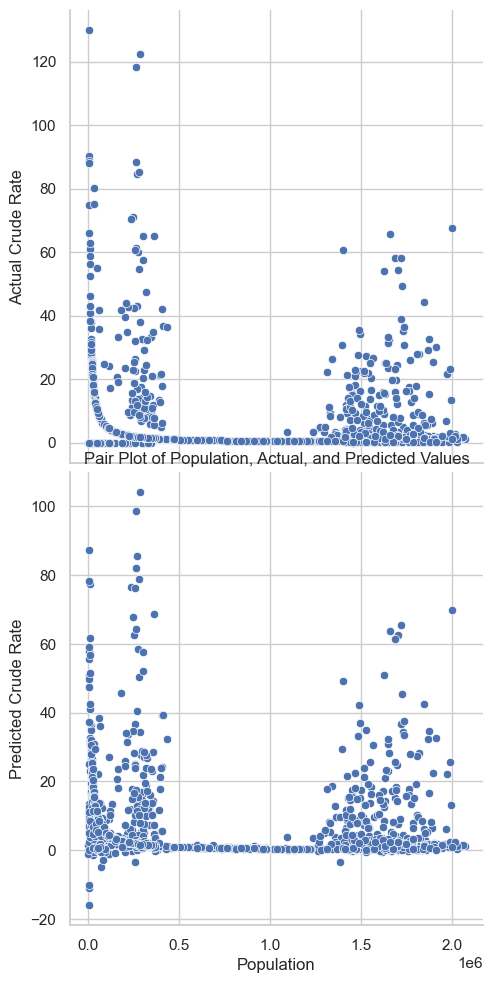

In [136]:
sns.pairplot(full_results_best_model, x_vars=['Population'], y_vars=['Actual Crude Rate', 'Predicted Crude Rate'], 
             kind='scatter', height=5, aspect=1)
plt.title('Pair Plot of Population, Actual, and Predicted Values')
plt.show()

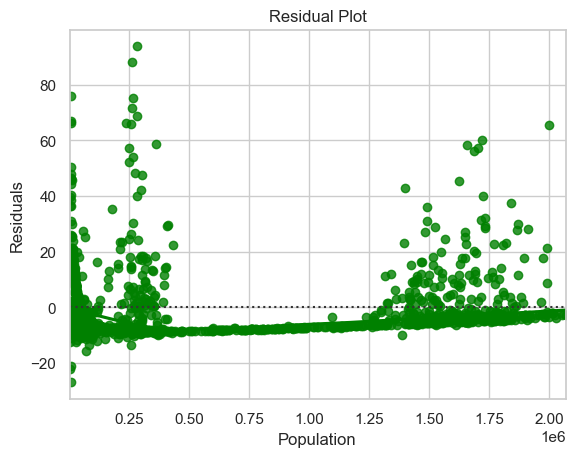

In [137]:
sns.residplot(x='Population', y='Predicted Crude Rate', 
              data=full_results_best_model, lowess=True, color='green')
plt.title('Residual Plot')
plt.xlabel('Population')
plt.ylabel('Residuals')
plt.show()

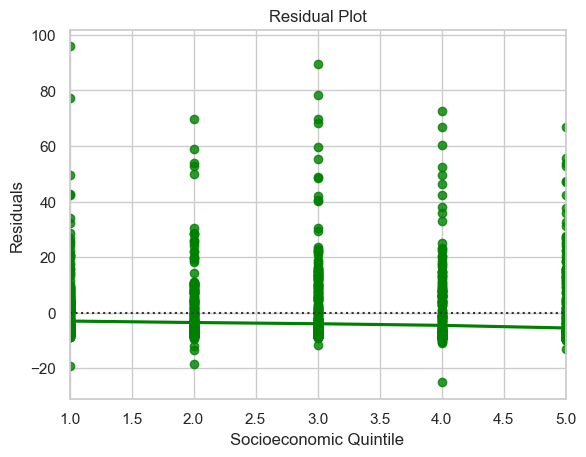

In [138]:
sns.residplot(x='socioec quintile', y='Predicted Crude Rate', 
              data=full_results_best_model, lowess=True, color='green')
plt.title('Residual Plot')
plt.xlabel('Socioeconomic Quintile')
plt.ylabel('Residuals')
plt.show()

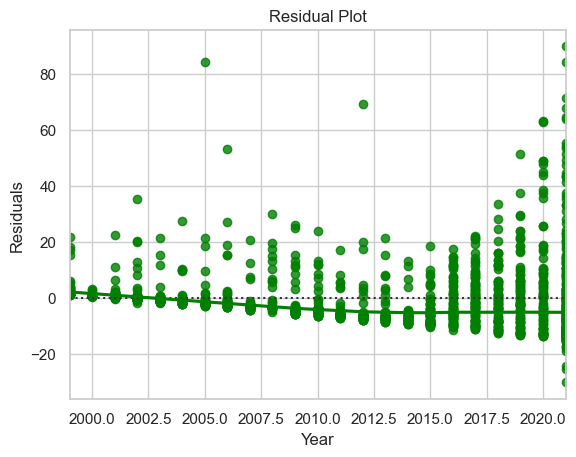

In [139]:
#full_results_best_model['Year'] = full_results_best_model['Year'].to_string
sns.residplot(x='Year', y='Predicted Crude Rate', 
              data=full_results_best_model, 
              lowess=True, color='green')
plt.title('Residual Plot')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.show()

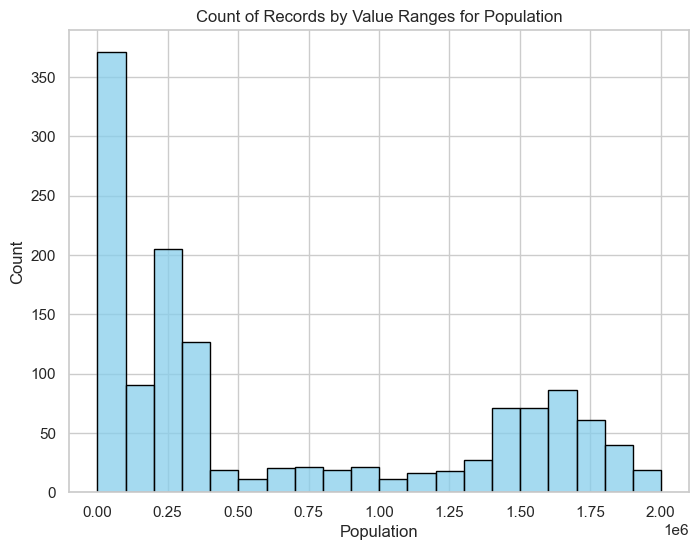

In [150]:
# Create ranges for binnin
bins = list(range(1000, 2067970, 100000))

# Countplot for the numeric column with binning
plt.figure(figsize=(8, 6))
sns.histplot(full_results_best_model['Population'], bins=bins, kde=False, color='skyblue', edgecolor='black')
plt.title('Count of Records by Value Ranges for Population')
plt.xlabel('Population')
plt.ylabel('Count')
plt.show()